### Computing autocorrelation time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import ising_analysis
import importlib
importlib.reload(ising_analysis)

<module 'ising_analysis' from '/Users/ecasiano/Desktop/RBM_versus_MC/ising_analysis.py'>

In [2]:
# Load correlated Monte Carlo data
L = 10
T = 2.25
data_correlated = np.loadtxt("correlated_monte_carlo_data/L_10_T_2.25_seed_0.dat")[:,0][6000:]/L**2
data_correlated_rbm = np.loadtxt("L_10_T_2.25_rbm_walk_0.dat")[:,0][6000:]/L**2

MC_steps = np.arange(data_correlated.shape[0])

#### As part of our computation of the integrated autocorrelation time, we will need to compute the normalized autocorrelation function:

$$ \rho(t) = \frac{c(t)}{c(0)} = \frac{\frac{1}{N-t}\sum_{i=1}^{N-t}{X_{i}X_{i+t}-{\left\langle{X}\right\rangle^2}}}{\left\langle{X^2}\right\rangle-{\left\langle{X}\right\rangle^2}} \sim e^{-\frac{t}{\tau_\mathrm{exp}}} $$

In [3]:
def autocorrelation(data):
    '''Computes normalized autocorrelation function of sample data for each time'''
    N = data.shape[0]
    _autocorrelation = np.zeros(N)
    for Δt in range(N-1): # let the time separation be all possible distances
        c0 = np.mean(data[:N - Δt]**2) - np.mean(data[:N - Δt])**2 #Variance at t0
        ct = np.mean(data[:N - Δt]*data[Δt:]) - np.mean(data[:N - Δt])*np.mean(data[Δt:]) # unnormalized autocorrelation fn.
        _autocorrelation[Δt] = ct/c0 # normalized autocorrelation function for this 'radius' (actually time separation)
    return _autocorrelation

def autocorrelation_function(time,scale,autocorrelation_time):
    '''exponential form of the autocorrelation function'''
    return scale*np.exp(-time/autocorrelation_time)

In [4]:
# Compute normalized autocorrelation function
_autocorrelation = autocorrelation(data_correlated)
_autocorrelation_rbm = autocorrelation(data_correlated_rbm)

# Eliminate nans (there's usually just a few)
_autocorrelation = np.ma.masked_array(_autocorrelation, ~np.isfinite(_autocorrelation)).filled(0)
_autocorrelation_rbm = np.ma.masked_array(_autocorrelation_rbm, ~np.isfinite(_autocorrelation_rbm)).filled(0)

# Time separations
time_separation = np.arange(_autocorrelation.shape[0])

In [5]:
# Fit autocorrelation to exponential form for all time separations
popt, perr = curve_fit(autocorrelation_function, time_separation, _autocorrelation)
popt_rbm, perr_rbm = curve_fit(autocorrelation_function, time_separation, _autocorrelation_rbm)

#### The integrated autocorrelation is obtained by summing the autocorrelation function over all possible time separations:

$$ \tau_\mathrm{int}=\sum_t \frac{C(t)}{C(0)}$$

In [6]:
def integrated_autocorrelation_time(data):
    data_mean_squared = np.mean(data)**2
    variance = np.mean(data**2) - data_mean_squared # c(0)
    τ_int_auto = 0.0
    N = data.shape[0]
    for Δt in range(N):
#         τ_int_auto += np.mean(data[:N - Δt]*data[Δt:]) - data_mean_squared
        τ_int_auto += np.mean(data[:N - Δt]*data[Δt:]) - np.mean(data[:N - Δt])*np.mean(data[Δt:])
    return τ_int_auto/variance

In [7]:
def integrated_autocorrelation_time(data):
    data_mean_squared = np.mean(data)**2
    variance = np.mean(data**2) - data_mean_squared # c(0)
    τ_int_auto = 0.0
    N = data.shape[0]
    for Δt in range(N):
#         τ_int_auto += np.mean(data[:N - Δt]*data[Δt:]) - data_mean_squared
        τ_int_auto += np.mean(data[:N - Δt]*data[Δt:]) - np.mean(data[:N - Δt])*np.mean(data[Δt:])
    return τ_int_auto/variance

In [8]:
autocorrelation_time_int = integrated_autocorrelation_time(data_correlated) # I think we need to truncate this

#### We can obtain the autocorrelation time from a fitting of: $$Ae^{-t/\tau_{exp}}$$

In [9]:
print("τ_auto: {}".format(popt[1])) # from fitting
print("4τ_auto: {}".format(4*popt[1]))
# print("τ_auto_int: {}".format(autocorrelation_time_int)) # from using estimate
# print("τ_exact: {}".format(autocorrelation_time))

τ_auto: 9.247370505412581
4τ_auto: 36.989482021650325


#### The autocorrelation time can be computed for various estimators. Let's take a look at the magnetization per spin.

In [10]:
# Load correlated Monte Carlo data
L = 10
T = 2.25
data_correlated_m = np.loadtxt("correlated_monte_carlo_data/L_10_T_2.25_seed_0.dat")[:,1][6000:]/L**2
data_correlated_rbm_m = np.loadtxt("L_10_T_2.25_rbm_walk_0.dat")[:,1][6000:]/L**2

MC_steps = np.arange(data_correlated_m.shape[0])

In [11]:
# Compute normalized autocorrelation function
_autocorrelation_m = autocorrelation(data_correlated_m)
_autocorrelation_rbm_m = autocorrelation(data_correlated_rbm_m)

# Eliminate nans (there's usually just a few)
_autocorrelation_m = np.ma.masked_array(_autocorrelation_m, ~np.isfinite(_autocorrelation_m)).filled(0)
_autocorrelation_rbm_m = np.ma.masked_array(_autocorrelation_rbm_m, ~np.isfinite(_autocorrelation_rbm_m)).filled(0)

# Time separations
time_separation = np.arange(_autocorrelation_m.shape[0])

In [12]:
# Fit autocorrelation to exponential form for all time separations
popt_m, perr_m = curve_fit(autocorrelation_function, time_separation, _autocorrelation_m)
popt_rbm_m, perr_rbm_m = curve_fit(autocorrelation_function, time_separation, _autocorrelation_rbm_m)

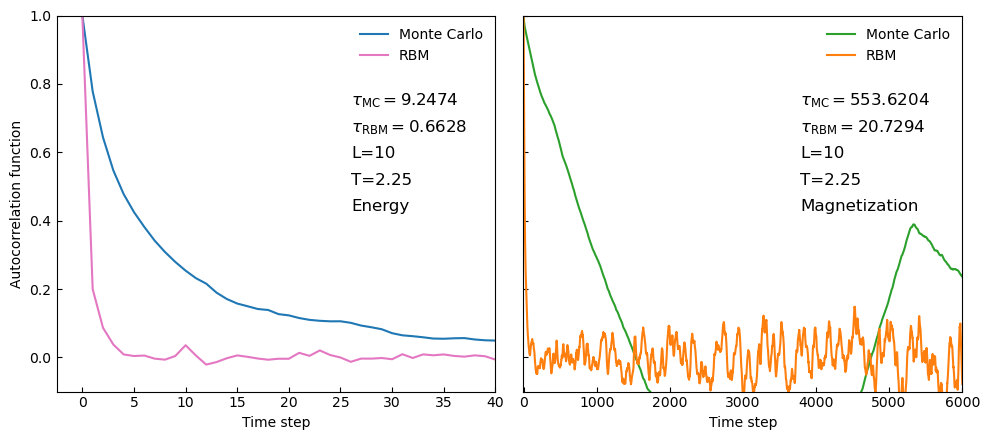

In [38]:
fig,ax = plt.subplots(1,2,figsize=(10,4.5),tight_layout=True,dpi=100,sharey=True)
plt.subplots_adjust(wspace=0.04)
ax[0].plot(time_separation, _autocorrelation,'-',color='tab:blue',label='Monte Carlo') # autocorrelation function
ax[0].plot(time_separation, _autocorrelation_rbm,'-',color='tab:pink',label='RBM') # autocorrelation function

ax[0].set_xlim((-2.5,40))
ax[0].set_ylim(-0.1,1)
ax[0].set_yscale('linear')
ax[0].set_ylabel(r'Autocorrelation function');
ax[0].set_xlabel(r'Time step');
ax[0].tick_params(direction='in')
ax[0].legend(frameon=False)
ax[0].annotate(r"$\tau_{\rm{MC}}=%.4f$"%(popt[1]),(0.295+0.06,0.61+0.15),
                xycoords='figure fraction',fontsize=12)
ax[0].annotate(r"$\tau_{\rm{RBM}}=%.4f$"%(popt_rbm[1]),(0.295+0.06,0.61+0.09),
                xycoords='figure fraction',fontsize=12)
ax[0].annotate('L=10',(0.295+0.06,0.61+0.03),
                xycoords='figure fraction',fontsize=12)
ax[0].annotate(r"T=2.25"%(popt[1]),(0.295+0.06,0.61-0.03),
                xycoords='figure fraction',fontsize=12)
ax[0].annotate(r"Energy"%(popt[1]),(0.295+0.06,0.61-0.09),
                xycoords='figure fraction',fontsize=12)

ax[1].plot(time_separation, _autocorrelation_m,'-',color='tab:green',label='Monte Carlo') # autocorrelation function
ax[1].plot(time_separation, _autocorrelation_rbm_m,'-',color='tab:orange',label='RBM') # autocorrelation function

ax[1].set_xlim((-2.5,6000))
ax[1].set_ylim(-0.1,1)
ax[1].set_yscale('linear')
ax[1].set_ylabel(r'');
ax[1].set_xlabel(r'Time step');
ax[1].tick_params(direction='in')
ax[1].legend(frameon=False)
ax[1].annotate(r"$\tau_{\rm{MC}}=%.4f$"%(popt_m[1]),(0.748+0.06,0.61+0.15),
                xycoords='figure fraction',fontsize=12)
ax[1].annotate(r"$\tau_{\rm{RBM}}=%.4f$"%(popt_rbm_m[1]),(0.748+0.06,0.61+0.09),
                xycoords='figure fraction',fontsize=12)
ax[1].annotate('L=10',(0.748+0.06,0.61+0.03),
                xycoords='figure fraction',fontsize=12)
ax[1].annotate(r"T=2.25"%(popt[1]),(0.748+0.06,0.61-0.03),
                xycoords='figure fraction',fontsize=12)
ax[1].annotate(r"Magnetization"%(popt[1]),(0.748+0.06,0.61-0.09),
                xycoords='figure fraction',fontsize=12)

plt.savefig("act_comparison_T2.25_mc_rbm_combined.pdf",dpi=300)
plt.savefig("act_comparison_T2.25_mc_rbm_combined.png",dpi=300)